# CRISP-DM Processes and Stages
## Business Understanding - General Business understanding, role of data and required actionable information
For the "House Prices: Advanced Regression Techniques" dataset, the primary business goal is to accurately predict house prices based on various features. Understanding the data and its features will help in making more informed decisions in the real estate market.

## Determine Business Objectives - Business Objectives (SMART approach)
Objective: Predict house prices with a Mean Absolute Error (MAE) less than $20,000 to assist stakeholders in the real estate market in setting competitive prices and making informed purchasing decisions.

## Assess Situation - Inventory of Resources, Requirements, Assumptions and Constraints, Risks and Contingencies, Costs and Benefits
Resources: Dataset from Kaggle, computational resources for data processing and modeling.
Requirements: Python, pandas, scikit-learn, seaborn, matplotlib.
Assumptions: The data is representative of the broader real estate market.
Constraints: Limited to the features provided in the dataset.
Risks: Data may have missing values or outliers that could skew predictions.
Benefits: Enhanced decision-making capabilities in the real estate market.

## Determine Data Mining Goals - Data Mining Goals, Data Mining Success Criteria
Data Mining Goal: Build a regression model that predicts house prices based on the provided features.
Success Criteria: Achieve an MAE less than $20,000 on the test data.

## Produce Project Plan - Project Plan, Initial Assessment of Tools and Techniques
Project Plan:

Data Understanding: Load the dataset and explore its features and target variable.
Data Preparation: Handle missing values, outliers, and perform feature engineering.
Modeling: Split the data into training and test sets. Use a regression algorithm to predict house prices.
Evaluation: Evaluate the model's performance using MAE and adjust if necessary.


## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Procuring and Understanding

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

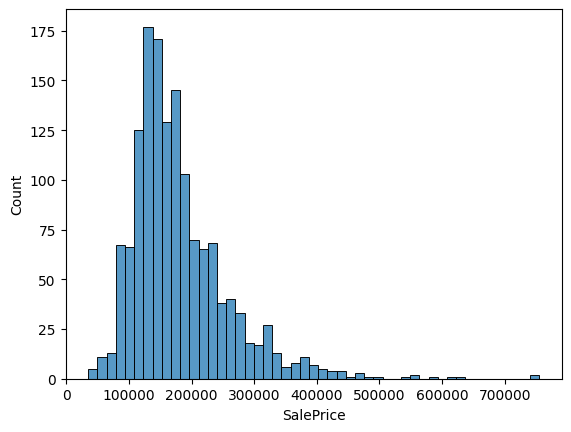

In [3]:
import pandas as pd

# Loading the dataset into a DataFrame
data = pd.read_csv('train.csv')

print(data.head())

# Descriptive statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize target variable distribution
sns.histplot(data['SalePrice'])
plt.show()

## Data Preparation

<ipython-input-5-ea2c5f149471>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


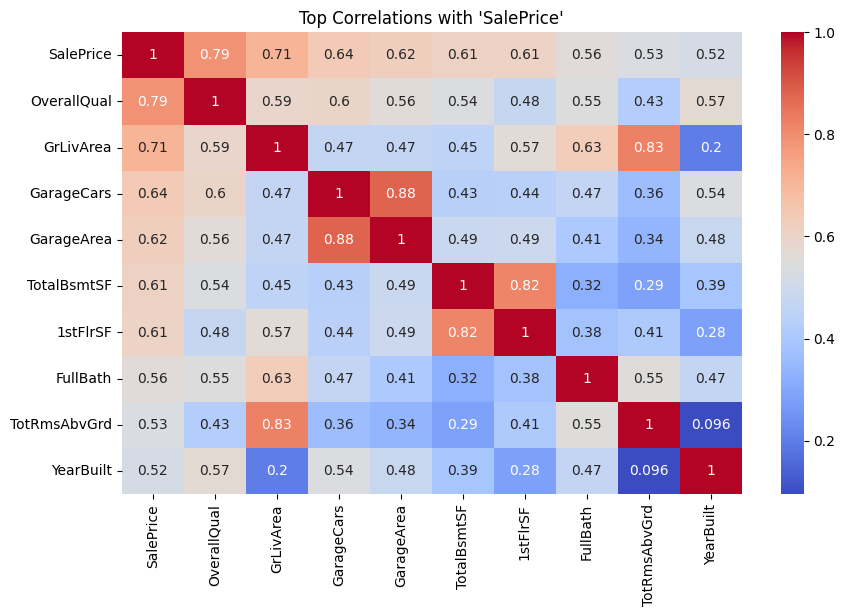

In [5]:
# Handle missing values - For simplicity, fill with median or mode
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Compute the correlation matrix
correlation_matrix = data.corr()

# For a more readable correlation matrix, consider only the top correlations with the target variable (e.g., 'SalePrice' or your specific target variable)
num_features = 10  # Number of top features to consider
top_corr_features = correlation_matrix.nlargest(num_features, 'SalePrice')['SalePrice'].index
reduced_corr_matrix = data[top_corr_features].corr()

# Visualize the reduced correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(reduced_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Top Correlations with 'SalePrice'")
plt.show()


## Modelling

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

# Define the data preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # drop='first' to avoid multicollinearity
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Preprocessing of training data and train model
pipeline.fit(X_train, y_train)

# Preprocessing of validation data and get predictions
predictions = pipeline.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 14, 15, 16, 19, 26, 40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Evaluating

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate the Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Square Error (RMSE): ${rmse:,.2f}")

# Interpretation:
# MAE provides the average error made by our model in predicting house prices.
# RMSE provides the square root of the average squared differences between predictions and actuals, emphasizing larger errors.


Mean Absolute Error (MAE): $23,848.13
Root Mean Square Error (RMSE): $74,958.90
